<a href="https://colab.research.google.com/github/askuts/Recommendation-system-for-online-store-/blob/main/Data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обработка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# загружаем библиотеки
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from numpy import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from datetime import date, timedelta
import calendar
!pip install pycountry

In [ ]:
# импортируем данные
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/online_retail_II.csv",
                   encoding='unicode_escape')
print("-"*50)
print(" Data imported successfully!!")
data.head(3).style.set_properties(**{"background-color": "#1fcecb",
                                     "color": "black", "border-color": "black"})
# используем цвет Яиц странствующего дрозда

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--------------------------------------------------
 Data imported successfully!!


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950000,13085.000000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750000,13085.000000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750000,13085.000000,United Kingdom


In [ ]:
# прописываем функцию для оптимизации описания данных в последующем
pd.set_option('display.max_columns', None)
def data_overview(df, head=5):
    print(" SHAPE OF DATASET ".center(125,'-'))
    print('Rows:{}'.format(df.shape[0]))
    print('Columns:{}'.format(df.shape[1]))
    print(" HEAD ".center(125,'-'))
    print(df.head(head))
    print("DATA TYPES".center(125,'-'))
    print(data.dtypes.value_counts())
    print(" MISSING VALUES ".center(125,'-'))
    print(df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending = False))
    print(" DUPLICATED VALUES ".center(125,'-'))
    print(df.duplicated().sum())
    print(" STATISTICS OF DATA ".center(125,'-'))
    print(df.describe(include="all"))
    print("DATA INFO".center(125,'-'))
    print(df.info())


data_overview(data)

------------------------------------------------------ SHAPE OF DATASET -----------------------------------------------------
Rows:1067371
Columns:8
------------------------------------------------------------ HEAD -----------------------------------------------------------
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  

In [ ]:
# Используем цикл и множества для поиска полностью идентичных строк
duplicates = set()
seen = set()

for row in data:
    row_tuple = tuple(row)
    if row_tuple in seen:
        duplicates.add(row_tuple)
    else:
        seen.add(row_tuple)

print("Полностью идентичные строки:", list(duplicates))

Полностью идентичные строки: []


In [ ]:
# выводим информацию по возвратам (Код чека начинается с С)
data[data['Invoice'].str.startswith('C')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
# Удаляем строки с пропущенными значениями в столбце 'CustomerID'.
print("Shape of data before removing NaN's CustomerID",data.shape)
data.dropna(subset="Customer ID",axis=0,inplace=True)
print("Shape of data after removing NaN's CustomerID",data.shape)

Shape of data before removing NaN's CustomerID (1067371, 8)
Shape of data after removing NaN's CustomerID (824364, 8)


In [ ]:
print(
    "Missing values in each column after cleaning customerID :\n",
    data.isnull().sum())

Missing values in each column after cleaning customerID :
 Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [ ]:
# Проверяем отрицательных значений в столбце 'Quantity'.
# Удаляем строки, где 'Quantity' меньше 0.
print("Negative value in Quantity is:",(data.Quantity<0).sum())
data = data.loc[data.Quantity >= 0]
print("Negative value in Quantity after cleaning:",(data.Quantity<0).sum())
print("Negative value in UnitPrice is:",(data.Price<0).sum())

Negative value in Quantity is: 18744
Negative value in Quantity after cleaning: 0
Negative value in UnitPrice is: 0


In [ ]:
# выводим информацию по возвратам (Код чека начинается с С)
data[data['Invoice'].str.startswith('C')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [ ]:
data[data['Price'] == 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom
16107,490727,M,Manual,1,2009-12-07 16:38:00,0.0,17231.0,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
...,...,...,...,...,...,...,...,...
1004540,577129,22464,HANGING METAL HEART LANTERN,4,2011-11-17 19:52:00,0.0,15602.0,United Kingdom
1005014,577168,M,Manual,1,2011-11-18 10:42:00,0.0,12603.0,Germany
1006110,577314,23407,SET OF 2 TRAYS HOME SWEET HOME,2,2011-11-18 13:23:00,0.0,12444.0,Norway
1011446,577696,M,Manual,1,2011-11-21 11:57:00,0.0,16406.0,United Kingdom


In [ ]:
data[data['Description'] == 'Manual']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
11310,490300,M,Manual,1,2009-12-04 14:19:00,0.85,12970.0,United Kingdom
11311,490300,M,Manual,1,2009-12-04 14:19:00,0.21,12970.0,United Kingdom
16107,490727,M,Manual,1,2009-12-07 16:38:00,0.00,17231.0,United Kingdom
17386,490760,M,Manual,1,2009-12-08 09:49:00,10.00,14295.0,United Kingdom
17887,490881,M,Manual,1,2009-12-08 12:58:00,10.00,16210.0,United Kingdom
...,...,...,...,...,...,...,...,...
1051476,580645,M,Manual,1,2011-12-05 13:11:00,219.50,17857.0,United Kingdom
1051479,580646,M,Manual,800,2011-12-05 13:13:00,0.25,17857.0,United Kingdom
1056337,580884,M,Manual,1,2011-12-06 12:21:00,0.85,15907.0,United Kingdom
1056893,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.0,United Kingdom


In [ ]:
data = data[data['Description'] != 'Manual']
data = data[data['Price'] != 0]

In [ ]:
# Вывод статистики для столбца 'Quantity'
# data['Quantity']
# data['Price']
print("Статистика для столбца 'Quantity':")
print('max_value', data['Quantity'].max())
print('min_value', data['Quantity'].min())
print('mode_value', data['Quantity'].mode()[0])
print('median_value', data['Quantity'].median())
print('mean_value', data['Quantity'].mean())
print()
print("Статистика для столбца 'Price':")
print('max_value', data['Price'].max())
print('min_value', data['Price'].min())
print('mode_value', data['Price'].mode()[0])
print('median_value', data['Price'].median())
print('mean_value', data['Price'].mean())

Статистика для столбца 'Quantity':
max_value 80995
min_value 1
mode_value 1
median_value 5.0
mean_value 13.290050196312311

Статистика для столбца 'Price':
max_value 8142.75
min_value 0.001
mode_value 1.25
median_value 1.95
mean_value 3.027528512499379


In [ ]:
# Обрабатываем выбросы
# outlier_thresholds: вычисляем верхние и нижние пороги для выявления
# выбросов на основе интерквартильного диапазона.
# replace_with_threshold: заменяем значения, превышающие порог, пороговым значением.
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 2 * interquantile_range
    low_limit = quartile1 - 2 * interquantile_range
    return up_limit, low_limit

def replace_with_threshold(dataframe, variable):
    up_limit, low_limit = outlier_thresholds(dataframe, variable)
    # dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

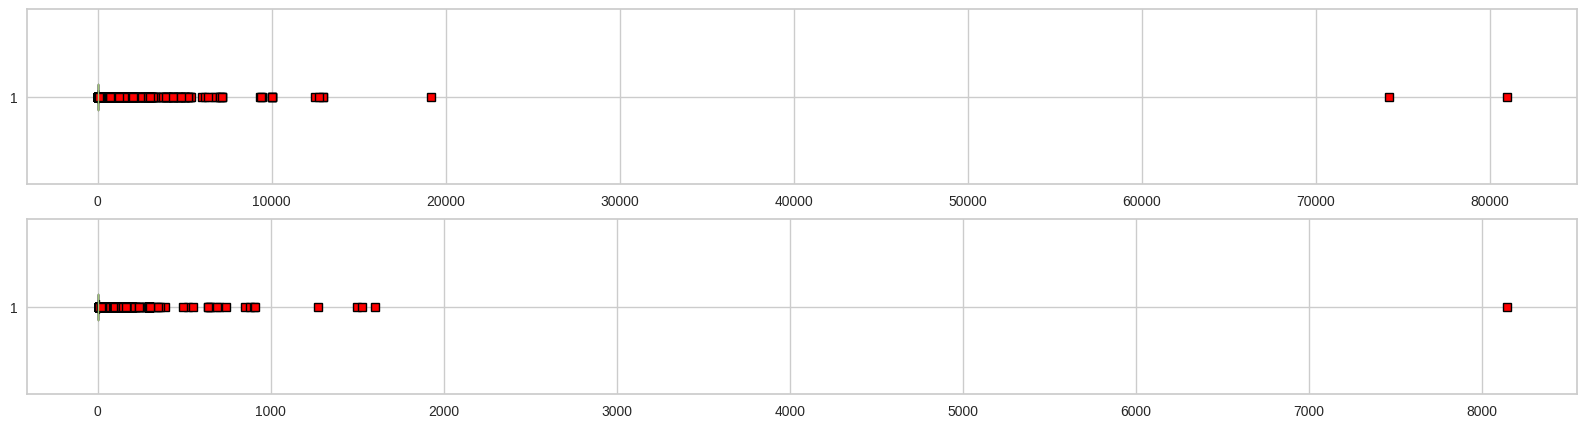

In [ ]:
# Ящики с усами до обработки выбросов
f, ax = plt.subplots(2,1, figsize = (20,5))
col_list = ["Quantity","Price"]
for i in range(0,2):
    ax[i].boxplot(data[col_list[i]],flierprops = dict(marker = "s", markerfacecolor = "red"), vert = 0)
plt.show()

In [ ]:
# Замена выбросов пороговыми значениями
replace_with_threshold(data, "Quantity")
replace_with_threshold(data, "Price")

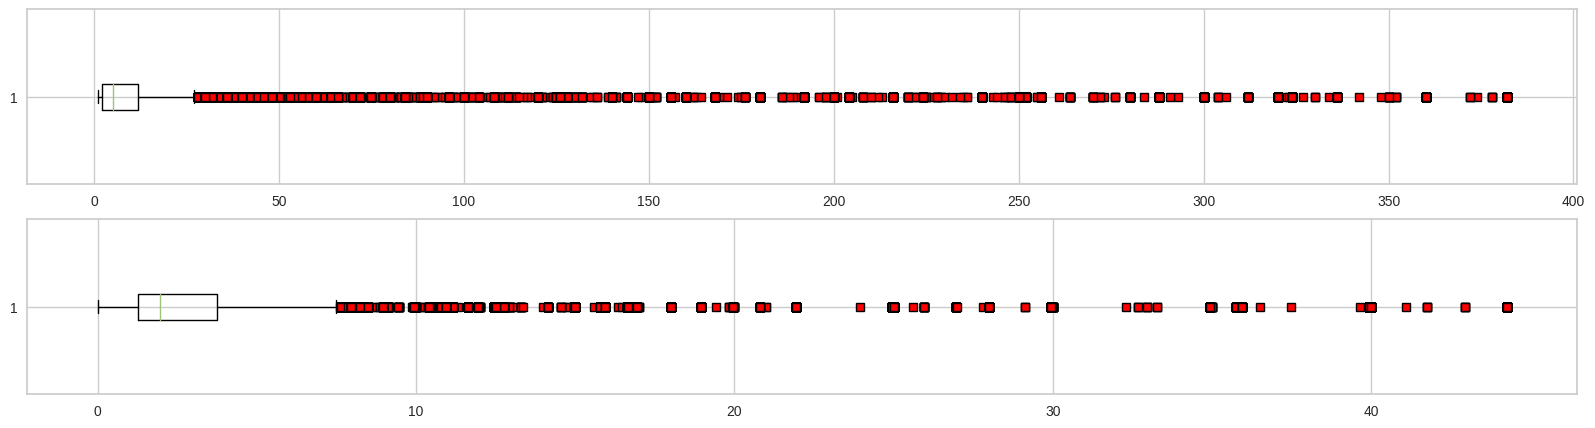

In [ ]:
# Ящики с усами после обработки выбросов
f, ax = plt.subplots(2,1, figsize = (20,5))
for i in range(0,2):
    ax[i].boxplot(data[col_list[i]],flierprops = dict(marker = "s",
                                                      markerfacecolor = "red"),
                                                      vert = 0)
plt.show()

In [ ]:
# Вывод статистики для столбца 'Quantity'
# data['Quantity']
# data['Price']
print("Статистика для столбца 'Quantity':")
print('max_value', data['Quantity'].max())
print('min_value', data['Quantity'].min())
print('mode_value', data['Quantity'].mode()[0])
print('median_value', data['Quantity'].median())
print('mean_value', data['Quantity'].mean())
print()
print("Статистика для столбца 'Price':")
print('max_value', data['Price'].max())
print('min_value', data['Price'].min())
print('mode_value', data['Price'].mode()[0])
print('median_value', data['Price'].median())
print('mean_value', data['Price'].mean())

Статистика для столбца 'Quantity':
max_value 382
min_value 1
mode_value 1
median_value 5.0
mean_value 11.980830972615674

Статистика для столбца 'Price':
max_value 44.269999999999996
min_value 0.001
mode_value 1.25
median_value 1.95
mean_value 2.952478055265642


In [ ]:
# выводим информацию по странам
data['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Denmark', 'Netherlands', 'Poland',
       'Channel Islands', 'Spain', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland', 'Italy',
       'Switzerland', 'Japan', 'Unspecified', 'Nigeria', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania',
       'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland', 'Lebanon',
       'Saudi Arabia', 'Czech Republic', 'European Community'],
      dtype=object)

In [ ]:
# удаляем Неоппределенные страны из выборки и ЕС
data = data[data['Country'] != 'Unspecified']
data = data[data['Country'] != 'European Community']

In [ ]:
# выводим информацию по странам
data['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Denmark', 'Netherlands', 'Poland',
       'Channel Islands', 'Spain', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland', 'Italy',
       'Switzerland', 'Japan', 'Nigeria', 'Malta', 'RSA', 'Singapore',
       'Bahrain', 'Thailand', 'Israel', 'Lithuania', 'West Indies',
       'Korea', 'Brazil', 'Canada', 'Iceland', 'Lebanon', 'Saudi Arabia',
       'Czech Republic'], dtype=object)

# Добавление столбцов, группировка, расширение данных

In [ ]:
data.head(3).style.set_properties(**{"background-color": "#1fcecb",
                                     "color": "black", "border-color": "black"})

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950000,13085.000000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750000,13085.000000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750000,13085.000000,United Kingdom


In [ ]:
# добавляем столбцы: время, день-месяц, месяц, день-месяц-год
data['T'] = data['InvoiceDate'].str.split(' ').str.get(1)
data['M'] = data['InvoiceDate'].str.split('-').str.get(1)
data['FD'] = data['InvoiceDate'].str.split(' ').str.get(0)

In [ ]:
data.head(3).style.set_properties(**{"background-color": "#1fcecb",
                                    "color": "black", "border-color": "black"})

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,T,M,FD
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950000,13085.000000,United Kingdom,07:45:00,12,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750000,13085.000000,United Kingdom,07:45:00,12,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750000,13085.000000,United Kingdom,07:45:00,12,2009-12-01


In [ ]:
# добавляем столбец с данными по дням недели
import datetime
from datetime import datetime, timedelta

data['DoW'] = data['InvoiceDate'].apply(lambda x: (
  datetime.strptime(x, '%Y-%m-%d %H:%M:%S') - timedelta(days=1)).strftime('%A'))

In [ ]:
data.head(3).style.set_properties(**{"background-color": "#1fcecb",
                                    "color": "black", "border-color": "black"})

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,T,M,FD,DoW
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950000,13085.000000,United Kingdom,07:45:00,12,2009-12-01,Monday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750000,13085.000000,United Kingdom,07:45:00,12,2009-12-01,Monday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750000,13085.000000,United Kingdom,07:45:00,12,2009-12-01,Monday


In [ ]:
sorted(data['Country'].unique())

['Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brazil',
 'Canada',
 'Channel Islands',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'EIRE',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Israel',
 'Italy',
 'Japan',
 'Korea',
 'Lebanon',
 'Lithuania',
 'Malta',
 'Netherlands',
 'Nigeria',
 'Norway',
 'Poland',
 'Portugal',
 'RSA',
 'Saudi Arabia',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'Thailand',
 'USA',
 'United Arab Emirates',
 'United Kingdom',
 'West Indies']

In [ ]:
data['Country'] = data['Country'].replace('EIRE', 'Ireland')

In [ ]:
# присваиваем территориальным странам Территорию
Country_dict ={
 'Australia': 'Oceania',
 'Austria': 'Central Europe',
 'Bahrain': 'SouthWest Asia',
 'Belgium': 'West Europe',
 'Brazil': 'South America',
 'Canada': 'North America',
 'Channel Islands': 'West Europe',
 'Cyprus': 'South Europe',
 'Czech Republic': 'Central Europe',
 'Denmark': 'North Europe',
 'Ireland': 'West Europe',
 'Finland': 'North Europe',
 'France': 'West Europe',
 'Germany': 'West Europe',
 'Greece': 'South Europe',
 'Iceland': 'North Europe',
 'Israel': 'SouthWest Asia',
 'Italy': 'South Europe',
 'Japan': 'East Asia',
 'Korea' : 'East Asia',
 'Lebanon': 'SouthWest Asia',
 'Lithuania': 'North Europe',
 'Malta': 'South Europe',
 'Netherlands': 'West Europe',
 'Nigeria': 'West Africa',
 'Norway': 'North Europe',
 'Poland': 'Central Europe',
 'Portugal': 'South Europe',
 'RSA': 'Central Africa',
 'Saudi Arabia': 'SouthWest Asia',
 'Singapore': 'SouthEast Asia',
 'Spain': 'South Europe',
 'Sweden': 'North Europe',
 'Switzerland': 'Central Europe',
 'Thailand': 'SouthEast Asia',
 'USA': 'North America',
 'United Arab Emirates': 'SouthWest Asia',
 'United Kingdom': 'West Europe',
 'West Indies': 'North America'
}

data['Territory'] = data['Country'].map(Country_dict)

In [ ]:
sorted(data['Territory'].unique())

['Central Africa',
 'Central Europe',
 'East Asia',
 'North America',
 'North Europe',
 'Oceania',
 'South America',
 'South Europe',
 'SouthEast Asia',
 'SouthWest Asia',
 'West Africa',
 'West Europe']

In [ ]:
# Присваиваем территориальным данным Регион
Territory_dict ={
 'Central Africa': 'Africa',
 'Central Europe': 'Europe',
 'East Asia': 'Asia',
 'North America': 'America',
 'North Europe': 'Europe',
 'Oceania': 'Oceania',
 'South America': 'America',
 'South Europe': 'Europe',
 'SouthEast Asia': 'Asia',
 'SouthWest Asia': 'Asia',
 'West Africa': 'Africa',
 'West Europe': 'Europe'
}

data['Region'] = data['Territory'].map(Territory_dict)

In [ ]:
def assign_time_of_day(time_value):
    time_value = pd.to_datetime(time_value, format='%H:%M:%S').time()

    if 5 <= time_value.hour < 12:
        return 'morning'
    elif 12 <= time_value.hour < 18:
        return 'day'
    elif 18 <= time_value.hour <= 23:
        return 'evening'
    else:
        return 'night'

data['ToD'] = data['T'].apply(assign_time_of_day)

In [ ]:
# присваиваем временным данным Квартал
def assign_quarter(row):
 try:
        row = float(row)
        if 1 <= row <= 3:
            return 'Q1'
        elif 4 <= row <= 6:
            return 'Q2'
        elif 7 <= row <= 9:
            return 'Q3'
        else:
            return 'Q4'
 except ValueError:
        return 'Q4'

data['Q'] = data['M'].apply(assign_quarter)

In [ ]:
data['Revenue'] = data['Quantity'] * data['Price']

In [ ]:
data.head(10).style.set_properties(**{"background-color": "#1fcecb",
                                    "color": "black", "border-color": "black"})

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,T,M,FD,DoW,Territory,Region,ToD,Q,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950000,13085.000000,United Kingdom,07:45:00,12,2009-12-01,Monday,West Europe,Europe,morning,Q4,83.400000
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750000,13085.000000,United Kingdom,07:45:00,12,2009-12-01,Monday,West Europe,Europe,morning,Q4,81.000000
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750000,13085.000000,United Kingdom,07:45:00,12,2009-12-01,Monday,West Europe,Europe,morning,Q4,81.000000
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100000,13085.000000,United Kingdom,07:45:00,12,2009-12-01,Monday,West Europe,Europe,morning,Q4,100.800000
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250000,13085.000000,United Kingdom,07:45:00,12,2009-12-01,Monday,West Europe,Europe,morning,Q4,30.000000
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.650000,13085.000000,United Kingdom,07:45:00,12,2009-12-01,Monday,West Europe,Europe,morning,Q4,39.600000
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.250000,13085.000000,United Kingdom,07:45:00,12,2009-12-01,Monday,West Europe,Europe,morning,Q4,30.000000
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.950000,13085.000000,United Kingdom,07:45:00,12,2009-12-01,Monday,West Europe,Europe,morning,Q4,59.500000
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.550000,13085.000000,United Kingdom,07:46:00,12,2009-12-01,Monday,West Europe,Europe,morning,Q4,30.600000
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.750000,13085.000000,United Kingdom,07:46:00,12,2009-12-01,Monday,West Europe,Europe,morning,Q4,45.000000


In [ ]:
sorted(data['Country'].unique())

['Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brazil',
 'Canada',
 'Channel Islands',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Korea',
 'Lebanon',
 'Lithuania',
 'Malta',
 'Netherlands',
 'Nigeria',
 'Norway',
 'Poland',
 'Portugal',
 'RSA',
 'Saudi Arabia',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'Thailand',
 'USA',
 'United Arab Emirates',
 'United Kingdom',
 'West Indies']

In [ ]:
# добавляем данные о праздниках по странам. Часть 1
# Импортируем данные о праздниках за 2010 и 2011 года у некоторых стран
!pip install workalendar
from workalendar.europe import Austria, Belgium, Cyprus, CzechRepublic, \
Denmark, Finland, France, Germany, Greece, Iceland, Ireland,\
Italy, Lithuania, Luxembourg, Malta, Netherlands, Norway, Poland, Portugal, \
Slovakia, Slovenia, Spain, Sweden, Switzerland, UnitedKingdom
from workalendar.asia import Israel, Japan, Singapore, SouthKorea
from workalendar.america import Brazil, Canada, Chile
from workalendar.africa import Nigeria

# Список стран
countries_list = [
    Austria(), Belgium(), Brazil(), Canada(), Chile(), Cyprus(),
    CzechRepublic(), Denmark(), Finland(), France(), Germany(), Greece(),
    Iceland(), Israel(), Italy(), Japan(), Lithuania(), Luxembourg(), Malta(),
    Netherlands(), Norway(), Poland(), Portugal(), Slovakia(), Slovenia(),
    Spain(), Sweden(),     Switzerland(), UnitedKingdom(), Singapore(),
    SouthKorea(), Nigeria(), Ireland ()]

# Создается пустой DataFrame df1, который будет использоваться
# для хранения данных о праздниках для разных стран
df1 = pd.DataFrame(columns=['Date', 'Country'])


# Здесь цикл проходит по каждой стране из countries_list, извлекает праздники
# за 2009-2011 годы, объединяет их в общий список all_holidays
# и добавляет данные в DataFrame df1
# Получаем праздники для каждой страны за 2009, 2010 и 2011 годы
for cal in countries_list:
    # Извлекаем праздники за 2009, 2010 и 2011 годы
    holidays_2009 = cal.holidays(2009)
    holidays_2010 = cal.holidays(2010)
    holidays_2011 = cal.holidays(2011)

    # Объединяем праздники в единый список
    all_holidays = holidays_2009 + holidays_2010 + holidays_2011

    # Добавляем данные в DataFrame
    for date, name in all_holidays:
        df1 = df1.append({'Date': date, 'Country': cal.__class__.__name__},
                         ignore_index=True)

# Преобразуем столбец 'Date' в формат datetime
df1['Date'] = pd.to_datetime(df1['Date'])

# Выводим полученные данные
print(df1)


/usr/local/lib/python3.10/dist-packages/workalendar/core.py:436: UserWarning: Please take note that, due to arbitrary decisions, this Islamic calendar computation may be wrong.
  warnings.warn('Please take note that, due to arbitrary decisions, '
/usr/local/lib/python3.10/dist-packages/workalendar/core.py:436: UserWarning: Please take note that, due to arbitrary decisions, this Islamic calendar computation may be wrong.
  warnings.warn('Please take note that, due to arbitrary decisions, '


           Date  Country
0    2009-01-01  Austria
1    2009-01-06  Austria
2    2009-04-13  Austria
3    2009-05-01  Austria
4    2009-05-21  Austria
...         ...      ...
1250 2011-10-31  Ireland
1251 2011-12-25  Ireland
1252 2011-12-26  Ireland
1253 2011-12-26  Ireland
1254 2011-12-27  Ireland

[1255 rows x 2 columns]


In [ ]:

# добавляем данные о праздниках по странам. Часть 2
# Получение данных о праздниках для США, Бахрейна и Саудовской Аравии,
# Австралии, ОАЭ, Тайланд
import holidays
from datetime import datetime

years = [2009, 2010, 2011]
USlist = []
for year in years:
    print(f"Holidays in USA {year}:")
    us_holidays = holidays.UnitedStates(years=year)
    for date in sorted(list(us_holidays.items())):
        USlist.append(date[0].strftime('%Y-%m-%d'))
print(USlist)

Bahrainlist = []
for year in years:
    print(f"Holidays in Bahrain {year}:")
    bh_holidays = holidays.Bahrain(years=year)
    for date, name in sorted(list(bh_holidays.items())):
        Bahrainlist.append(date.strftime('%Y-%m-%d'))
print(Bahrainlist)

Saudlist = []
for year in years:
    print(f"Holidays in SaudiArabia {year}:")
    bh_holidays = holidays.SaudiArabia(years=year)
    for date, name in sorted(list(bh_holidays.items())):
        Saudlist.append(date.strftime('%Y-%m-%d'))
print(Saudlist)

Australialist = []
for year in years:
    print(f"Holidays in Australia {year}:")
    aus_holidays = holidays.Australia(years=year)
    for date, name in sorted(list(aus_holidays.items())):
        Australialist.append(date.strftime('%Y-%m-%d'))
print(Australialist)

UAElist = []
for year in years:
    print(f"Holidays in United Arab Emirates {year}:")
    aus_holidays = holidays.UnitedArabEmirates(years=year)
    for date, name in sorted(list(aus_holidays.items())):
       UAElist.append(date.strftime('%Y-%m-%d'))
print(UAElist)

Thlist = []
for year in years:
    print(f"Holidays in Thailand {year}:")
    aus_holidays = holidays.Thailand(years=year)
    for date, name in sorted(list(aus_holidays.items())):
       Thlist.append(date.strftime('%Y-%m-%d'))
print(Thlist)


df2 = pd.DataFrame({'Date':
            USlist + Bahrainlist + Saudlist + Australialist + UAElist + Thlist,
             'Country': ['USA'] * len(USlist) + [
                'Bahrain'] * len(Bahrainlist) + [
                    'Saudi Arabia'] * len(Saudlist) + [
                        'Australia'] * len(Australialist) + [
                            'United Arab Emirates'] * len(UAElist) + [
                                'Thailand'] * len(Thlist)})

# Преобразуем столбец 'Date' в формат datetime
df2['Date'] = pd.to_datetime(df2['Date'])
print(df2)

Holidays in USA 2009:
Holidays in USA 2010:
Holidays in USA 2011:
['2009-01-01', '2009-01-19', '2009-02-16', '2009-05-25', '2009-07-03', '2009-07-04', '2009-09-07', '2009-10-12', '2009-11-11', '2009-11-26', '2009-12-25', '2010-01-01', '2010-01-18', '2010-02-15', '2010-05-31', '2010-07-04', '2010-07-05', '2010-09-06', '2010-10-11', '2010-11-11', '2010-11-25', '2010-12-24', '2010-12-25', '2010-12-31', '2011-01-01', '2011-01-17', '2011-02-21', '2011-05-30', '2011-07-04', '2011-09-05', '2011-10-10', '2011-11-11', '2011-11-24', '2011-12-25', '2011-12-26']
Holidays in Bahrain 2009:
Holidays in Bahrain 2010:
Holidays in Bahrain 2011:
['2009-01-01', '2009-01-06', '2009-01-07', '2009-03-09', '2009-05-01', '2009-09-20', '2009-09-21', '2009-09-22', '2009-11-27', '2009-11-28', '2009-11-29', '2009-12-16', '2009-12-17', '2009-12-18', '2009-12-26', '2009-12-27', '2010-01-01', '2010-02-26', '2010-05-01', '2010-09-10', '2010-09-11', '2010-09-12', '2010-11-16', '2010-11-17', '2010-11-18', '2010-12-07', 

In [ ]:
# Объединение df1 и df2 с помощью pd.concat
result = pd.concat([df1, df2], ignore_index=True)

result = result.rename(columns={'Date': 'Holiday'})
# Выводим результат
print(result)

        Holiday   Country
0    2009-01-01   Austria
1    2009-01-06   Austria
2    2009-04-13   Austria
3    2009-05-01   Austria
4    2009-05-21   Austria
...         ...       ...
1501 2011-10-31  Thailand
1502 2011-12-05  Thailand
1503 2011-12-10  Thailand
1504 2011-12-12  Thailand
1505 2011-12-31  Thailand

[1506 rows x 2 columns]


In [ ]:
# Заменяем значения в столбце 'Country'
result['Country'] = result['Country'].replace(
    {'UnitedKingdom': 'United Kingdom',
     'CzechRepublic': 'Czech Republic',
     'SouthKorea': 'Korea'})

set(result['Country'])

{'Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brazil',
 'Canada',
 'Chile',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Korea',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Nigeria',
 'Norway',
 'Poland',
 'Portugal',
 'Saudi Arabia',
 'Singapore',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Thailand',
 'USA',
 'United Arab Emirates',
 'United Kingdom'}

In [ ]:
set(data['Country'])

{'Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brazil',
 'Canada',
 'Channel Islands',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Korea',
 'Lebanon',
 'Lithuania',
 'Malta',
 'Netherlands',
 'Nigeria',
 'Norway',
 'Poland',
 'Portugal',
 'RSA',
 'Saudi Arabia',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'Thailand',
 'USA',
 'United Arab Emirates',
 'United Kingdom',
 'West Indies'}

In [ ]:
# Добавляем новый столбец с данными о том сколько осталось времени от время
# транзакции до ближайшего праздника релевантной страны в будущем
import numpy as np

# Преобразуем столбец 'FD' в формат datetime64[ns]
data['FD'] = pd.to_datetime(data['FD'], format='%Y-%m-%d', errors='coerce')

# Проверим и преобразуем тип данных для 'FD', если необходимо
if data['FD'].dtype != 'datetime64[ns]':
    data['FD'] = pd.to_datetime(data['FD'])

# Создаем новый столбец 'DUNH', заполненный нулями
data['DUNH'] = 0

# Для каждой страны извлекаем соответствующие праздники
for country, holidays_df in result.groupby('Country'):
    country_holidays = holidays_df['Holiday']

   # Находим ближайший будущий праздник для каждой покупки
    for index, row in data[data['Country'] == country].iterrows():
        purchase_date = row['FD']
        future_holidays = country_holidays[country_holidays > purchase_date]

        if not future_holidays.empty:
            nearest_holiday = min(
                future_holidays, key=lambda x: abs(x - purchase_date))
            days_until_holiday = (nearest_holiday - purchase_date).days

            # Обновляем значения в датафрейме
            data.at[index, 'DUNH'] = days_until_holiday

# Выводим результат
data.head(10).style.set_properties(**{"background-color": "#1fcecb",
                                    "color": "black", "border-color": "black"})

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,T,M,FD,DoW,Territory,Region,ToD,Q,Revenue,DUNH
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950000,13085.000000,United Kingdom,07:45:00,12,2009-12-01 00:00:00,Monday,West Europe,Europe,morning,Q4,83.400000,24
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750000,13085.000000,United Kingdom,07:45:00,12,2009-12-01 00:00:00,Monday,West Europe,Europe,morning,Q4,81.000000,24
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750000,13085.000000,United Kingdom,07:45:00,12,2009-12-01 00:00:00,Monday,West Europe,Europe,morning,Q4,81.000000,24
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100000,13085.000000,United Kingdom,07:45:00,12,2009-12-01 00:00:00,Monday,West Europe,Europe,morning,Q4,100.800000,24
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250000,13085.000000,United Kingdom,07:45:00,12,2009-12-01 00:00:00,Monday,West Europe,Europe,morning,Q4,30.000000,24
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.650000,13085.000000,United Kingdom,07:45:00,12,2009-12-01 00:00:00,Monday,West Europe,Europe,morning,Q4,39.600000,24
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.250000,13085.000000,United Kingdom,07:45:00,12,2009-12-01 00:00:00,Monday,West Europe,Europe,morning,Q4,30.000000,24
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.950000,13085.000000,United Kingdom,07:45:00,12,2009-12-01 00:00:00,Monday,West Europe,Europe,morning,Q4,59.500000,24
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.550000,13085.000000,United Kingdom,07:46:00,12,2009-12-01 00:00:00,Monday,West Europe,Europe,morning,Q4,30.600000,24
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.750000,13085.000000,United Kingdom,07:46:00,12,2009-12-01 00:00:00,Monday,West Europe,Europe,morning,Q4,45.000000,24


In [ ]:
data_overview(data)

------------------------------------------------------ SHAPE OF DATASET -----------------------------------------------------
Rows:804259
Columns:18
------------------------------------------------------------ HEAD -----------------------------------------------------------
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country         T   M  \
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  07:45:00  12   
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  07:45:00  12   
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  07:45:00  12   


In [ ]:
data.to_csv('FinalData.csv')
data.to_excel('FinalData.xlsx')

# Создаем новый датасет по UK. (добавляем инфляцию)

In [ ]:
new_data = data[data['Country'] == 'United Kingdom']
new_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,T,M,FD,DoW,Territory,Region,ToD,Q,Revenue,DUNH
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,07:45:00,12,2009-12-01,Monday,West Europe,Europe,morning,Q4,83.4,24
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,07:45:00,12,2009-12-01,Monday,West Europe,Europe,morning,Q4,81.0,24
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,07:45:00,12,2009-12-01,Monday,West Europe,Europe,morning,Q4,81.0,24
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,07:45:00,12,2009-12-01,Monday,West Europe,Europe,morning,Q4,100.8,24
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,07:45:00,12,2009-12-01,Monday,West Europe,Europe,morning,Q4,30.0,24


In [ ]:
# данные об уровне инфляции
data_2009 = [3.03, 3.13, 2.88, 2.38, 2.13, 1.76, 1.88, 1.52, 1.16, 1.51, 1.98,
             2.92]
data_2010 = [3.42, 3.04, 3.38, 3.72, 3.47, 3.23, 3.00, 3.22, 3.10, 3.21, 3.20,
             3.64]
data_2011 = [3.99, 4.31, 3.95, 4.48, 4.47, 4.25, 4.48, 4.45, 5.12, 5.00, 4.76,
             4.28]

# Создаем датафрейм с данными об уровне инфляции
df_2009 = pd.DataFrame({
    'Year': ['2009'] * len(data_2009),
    'Month': range(1, 13),
    'InflationRate': data_2009
})

df_2010 = pd.DataFrame({
    'Year': ['2010'] * len(data_2010),
    'Month': range(1, 13),
    'InflationRate': data_2010
})

df_2011 = pd.DataFrame({
    'Year': ['2011'] * len(data_2011),
    'Month': range(1, 13),
    'InflationRate': data_2011
})

Inflation = pd.concat([df_2009, df_2010, df_2011], ignore_index=True)

# Создаем новую колонку 'FD' с показателем инфляции
Inflation['FD'] = Inflation['Year'] + '-' + Inflation['Month'].astype(
    str).str.zfill(2)

# Выводим датафрейм с новой колонкой
print(Inflation[['FD', 'InflationRate']])

         FD  InflationRate
0   2009-01           3.03
1   2009-02           3.13
2   2009-03           2.88
3   2009-04           2.38
4   2009-05           2.13
5   2009-06           1.76
6   2009-07           1.88
7   2009-08           1.52
8   2009-09           1.16
9   2009-10           1.51
10  2009-11           1.98
11  2009-12           2.92
12  2010-01           3.42
13  2010-02           3.04
14  2010-03           3.38
15  2010-04           3.72
16  2010-05           3.47
17  2010-06           3.23
18  2010-07           3.00
19  2010-08           3.22
20  2010-09           3.10
21  2010-10           3.21
22  2010-11           3.20
23  2010-12           3.64
24  2011-01           3.99
25  2011-02           4.31
26  2011-03           3.95
27  2011-04           4.48
28  2011-05           4.47
29  2011-06           4.25
30  2011-07           4.48
31  2011-08           4.45
32  2011-09           5.12
33  2011-10           5.00
34  2011-11           4.76
35  2011-12           4.28


In [ ]:
new_data['FD'] = pd.to_datetime(new_data['FD'])
Inflation['FD'] = pd.to_datetime(Inflation['FD'])
new_data = pd.merge(new_data, Inflation[['FD', 'InflationRate']], on='FD',
                    how='left')
new_data.head()

<ipython-input-48-d4883caf6696>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['FD'] = pd.to_datetime(new_data['FD'])


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,T,M,FD,DoW,Territory,Region,ToD,Q,Revenue,DUNH,InflationRate
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,07:45:00,12,2009-12-01,Monday,West Europe,Europe,morning,Q4,83.4,24,2.92
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,07:45:00,12,2009-12-01,Monday,West Europe,Europe,morning,Q4,81.0,24,2.92
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,07:45:00,12,2009-12-01,Monday,West Europe,Europe,morning,Q4,81.0,24,2.92
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,07:45:00,12,2009-12-01,Monday,West Europe,Europe,morning,Q4,100.8,24,2.92
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,07:45:00,12,2009-12-01,Monday,West Europe,Europe,morning,Q4,30.0,24,2.92


In [ ]:
data.to_csv('DataUK.csv')
data.to_excel('DataUK.xlsx')